In [ ]:
!pip install imageio
import keras
import numpy as np
import pickle
import time
import imageio
import random
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten,LeakyReLU
from keras.layers import Conv2D,UpSampling2D,MaxPooling2D,Input,Reshape,Conv2DTranspose,GaussianNoise
from keras import optimizers

Using TensorFlow backend.


In [ ]:
'''prepare image data'''

'prepare image data'

In [ ]:
file_names = os.listdir('./anime_face/anime-faces/ponytail')
file_names = np.asarray(file_names)
print(file_names.shape)

NameError: ignored

In [ ]:

import os
img_data = None
if not os.path.isfile("images.pickle"):
    print("No File")
else:
    currenttime = time.time()
    with open('images.pickle','rb') as f:
        img_data = pickle.load(f) 
    print(time.time() - currenttime)
img_data = np.asarray(img_data)
img_data = img_data/255.
img_data = (img_data-0.5)/0.5

0.04963088035583496


In [ ]:
print(img_data.shape)

(1425, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


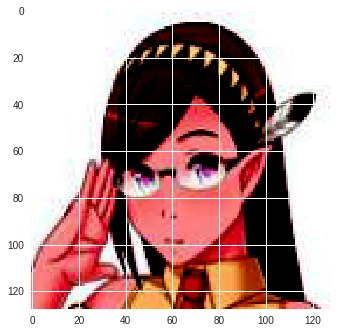

In [ ]:
plt.imshow(img_data[0])

In [ ]:
position_data = np.zeros((1425,128,128,2))

In [ ]:
position_ = np.zeros((128,128,2))
for i in range(128):
    for j in range(128):
        position_[i,j,0] = (i *1.0)/128.0
        position_[i,j,1] = (j *1.0)/128.0

In [ ]:
position_data[:] = position_

In [ ]:
full_img_data = np.concatenate((img_data,position_data),axis = 3)

In [ ]:
print(full_img_data.shape)

(1425, 128, 128, 5)


In [ ]:
import os 
img_data = []
file_names = os.listdir('.')
print(len(file_names))
if not os.path.isfile("hoimage.pickle"):
    for i in file_names[2:]:
        img = Image.open(i)
        img = img.resize((64,64),Image.BILINEAR)
        img = img.save(i)
        img = imageio.imread(i)
        img_data.append(img)
    img_data = np.asarray(img_data)
    with open('hoimage.pickle','wb') as f:
        pickle.dump(img_data,f)
else:
    with open('hoimage.pickle','rb') as f:
        img_data = pickle.load(f)

605


In [ ]:
img_data = []
currenttime = time.time()
for file_name in file_names:
    img_data.append(imageio.imread("./anime_face/anime-faces/ponytail/"+file_name))
print(time.time() - currenttime)
img_data = np.asarray(img_data)
img_data = img_data/255.
img_data = (img_data-0.5()/0.5

NameError: ignored

In [ ]:
print(img_data.shape)

(392, 128, 128, 3)


In [ ]:
class GAN:
    def __init__(self,img_height,img_width,img_channels):
        
        self.d_loss = []
        self.g_loss = []
        self.g_learning_rate = 3e-4
        self.d_learning_rate = 1.5e-4
        grms = optimizers.Adam(self.g_learning_rate,0.5)
        drms = optimizers.SGD(self.d_learning_rate,clipvalue = 0.2)
        self.img_height = img_height
        self.img_width = img_width
        self.img_channels = img_channels
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.generator.compile(loss = 'binary_crossentropy',optimizer = grms)
        self.discriminator.compile(loss = 'binary_crossentropy',optimizer = grms)
        z = Input(shape = (100,))
        self.discriminator.trainable = False
        img = self.generator(z)
        print(img.shape)
        valid = self.discriminator(img)
        
        self.combined_model = Model(z,valid)
        self.combined_model.compile(loss='binary_crossentropy', optimizer= grms)
        self.combined_model.summary()
    def build_generator(self):
        noise_shape = (100,)
        input_layer = Input(shape = noise_shape)
        
        x = Dense(1024*8*8)(input_layer)
        x = Reshape((8,8,1024))(x)
        x = BatchNormalization(momentum = 0.5)(x)
        
        for i in range(3):
            x = Conv2DTranspose(64,strides = 2,kernel_size = 4,padding = 'same')(x)
            x = GaussianNoise(0.1)(x)
            x = Activation(LeakyReLU(0.2))(x)
            x = BatchNormalization(momentum = 0.5)(x)
            x1 = Conv2D(64,kernel_size = 4,strides = 1,padding = 'same')(x)
            x1 = GaussianNoise(0.1)(x1)
            x1 = LeakyReLU(0.2)(x1)
            x1 = BatchNormalization(momentum = 0.5)(x1)
            x2 = Conv2D(32,kernel_size = 3,strides = 1,padding = 'same')(x1)
            x2 = GaussianNoise(0.1)(x2)
            x2 = BatchNormalization(momentum = 0.5)(x2)
            x2 = LeakyReLU(0.2)(x2)
            input_x = Conv2D(64,kernel_size = 3,strides = 1,padding = 'same')(x2)
            input_x = GaussianNoise(0.1)(input_x)
            input_x = LeakyReLU(0.2)(input_x)
            input_x = BatchNormalization(momentum = 0.5)(input_x)
            x = keras.layers.add([input_x,x])
        x = Conv2DTranspose(64,strides = 2,kernel_size = 4,padding = 'same')(x)
        x = LeakyReLU(0.2)(x)
        x = BatchNormalization(momentum = 0.5)(x)
        x = Conv2D(3,kernel_size = 4,strides = 1,padding = 'same')(x)
        x = Activation('tanh')(x)
        model = Model(input_layer,x)
        model.summary()
        
        return model
        
    def build_discriminator(self):
        '''img_shape = (self.img_height,self.img_width,self.img_channels)
        input_layer = Input(shape = img_shape)
        x = Conv2D(64,kernel_size = 5,strides = 1,padding = 'same')(input_layer)
        x = BatchNormalization(momentum = 0.5)(x)
        x = Activation(LeakyReLU(0.2))(x)
        for l in range(4):
            x = Conv2D(32,kernel_size = 3,strides = 1,padding = 'same')(x)
            x = BatchNormalization(momentum = 0.5)(x)
            x = Activation(LeakyReLU(0.2))(x)
            input_x = Conv2D(32,kernel_size = 3,strides = 1,padding ='same')(x)
            input_x = BatchNormalization(momentum = 0.5)(input_x)
            input_x = Activation(LeakyReLU(0.2))(input_x)
            x = keras.layers.add([x,input_x])
            x = Conv2D(32,kernel_size = 4,strides = 2,padding = 'same')(x)
            x = Activation(LeakyReLU(0.2))(x)
        # =============================
        # Build your discriminator here 
        # =============================
        x = Flatten()(x)
        x = Dense(1)(x)
        validity = Activation('sigmoid')(x)
        print('\n\n==========  Discriminator  ==========')
        
        model = Model(input_layer,validity)
        model.summary()
        #model.summary()
        return model'''
        img_shape = (self.img_height,self.img_width,3)
        model = Sequential()
        model.add(Conv2D(64,kernel_size = 3,strides = 1,input_shape = img_shape,padding = 'same',activation = LeakyReLU(0.2)))
        model.add(MaxPooling2D())
        model.add(LeakyReLU(0.5))
        model.add(Dropout(0.5))
        model.add(Conv2D(64,kernel_size = 3,strides = 1,padding = "same"))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D())
        model.add(LeakyReLU(0.2))
        model.add(Conv2D(64,kernel_size = 3,strides = 1,padding = "same"))
        model.add(MaxPooling2D())
        model.add(LeakyReLU(0.2))
        model.add(Conv2D(64,kernel_size = 3,strides = 1,padding = "same"))
        model.add(MaxPooling2D())
        model.add(LeakyReLU(0.2))
        model.add(Conv2D(64,kernel_size = 3,strides = 1,padding = "same"))
        model.add(MaxPooling2D())
        model.add(LeakyReLU(0.2))
        model.add(Conv2D(64,kernel_size = 3,strides = 1,padding = "same"))
        # =============================
        # Build your discriminator here 
        # =============================
        
        model.add(Flatten())
        model.add(Dense(1,activation = 'sigmoid'))
        print('\n\n==========  Discriminator  ==========')
        model.summary()
        
        img = Input(shape = img_shape)
        
        validity = model(img)
        #model.summary()
        return Model(img,validity)
    def train(self,x_data,epochs,batch_size):
        self.d_loss = []
        self.g_loss = []
        self.ng_train = 1
        self.nd_train = 1
        self.last_d = 0
        self.freezed = False
        for epoch in range(epochs):
            for n in range(self.nd_train):
                noise = np.random.normal(0,1,(batch_size,100))
                choose_index = np.random.randint(0,x_data.shape[0],batch_size)
                input_x = x_data[choose_index]
                gen_img = self.generator.predict(noise)
                label_fake = []
                label_real = []
                
                for i in range(batch_size):
                  label_fake.append(random.uniform(0.0,0.3))
                  label_real.append(random.uniform(0.7,1.2))
                
                d_loss_fake = self.discriminator.train_on_batch(gen_img,label_fake)
                d_loss_real = self.discriminator.train_on_batch(input_x[:,:,:,0:3],label_real)

                d_loss = 0.5 *(d_loss_fake+d_loss_real)
                    
            for n in range(self.ng_train):
                noise = np.random.normal(0,1,(batch_size,100))
                g_loss = self.combined_model.train_on_batch(noise,np.ones(batch_size))
                
            if epoch %40 == 0:
                print("========== %d =s=========" %(epoch))
                self.generate_9imgs()
            self.d_loss.append(d_loss)
            self.g_loss.append(g_loss)
            
    def output_generater(self):
        plt.imshow(self.generator.predict(np.random.normal(0,1,(1,100)))[0])
        plt.show()
    def plot_result(self):
        plt.plot(self.d_loss,label = "d_loss")
        plt.plot(self.g_loss,label = 'g_loss')
        plt.legend()
        plt.show()
    def generate_9imgs(self):
        noise = np.random.normal(0, 1, (9, 100))
        gen_imgs = self.generator.predict(noise)
        self.plot_images(gen_imgs, img_shape=(128, 128, 3))
    def plot_images(self,images, img_shape=(128, 128, 3)):
        assert len(images) == 9

        images += 1.0
        images /= 2.0

        if img_shape[2] == 1:
            img_shape = (img_shape[0], img_shape[1])
        # Create figure with 3x3 sub-plots.
        fig, axes = plt.subplots(3, 3)
        fig.subplots_adjust(hspace=0.3, wspace=0.3)

        for i, ax in enumerate(axes.flat):
            # Plot image.
            ax.imshow(images[i].reshape(img_shape))

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
        plt.show()

In [ ]:
num_data,img_height,img_width,img_channels = full_img_data.shape
gan = GAN(img_height,img_width,img_channels)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


========== 0 =s=========


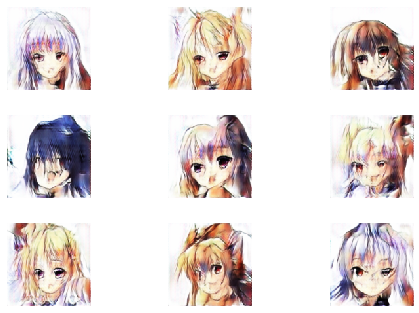

========== 40 =s=========


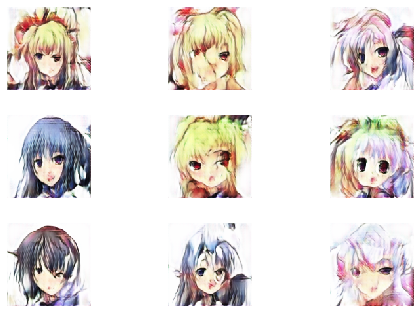

========== 80 =s=========


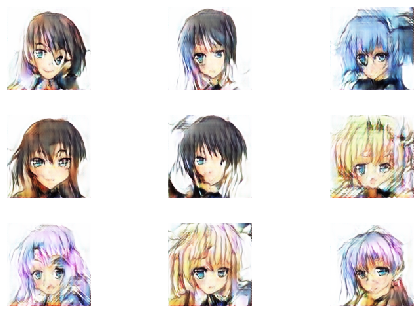

========== 120 =s=========


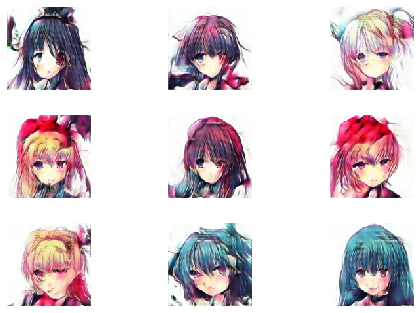

========== 160 =s=========


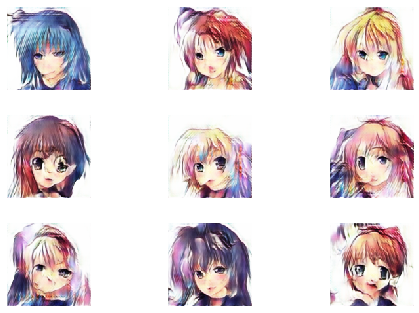

========== 200 =s=========


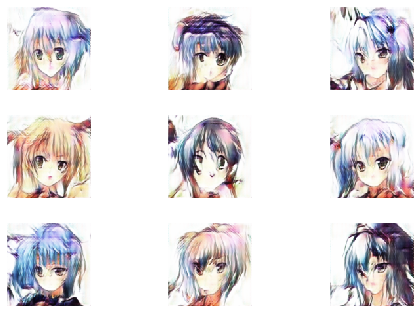

========== 240 =s=========


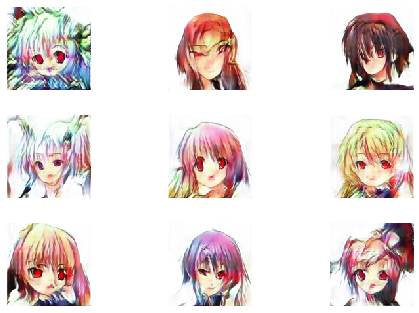

========== 280 =s=========


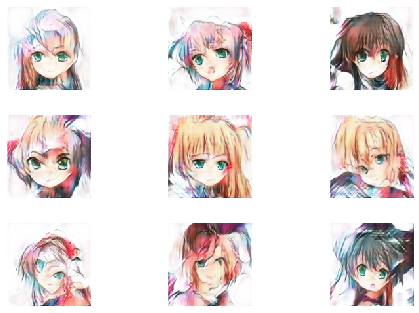

========== 320 =s=========


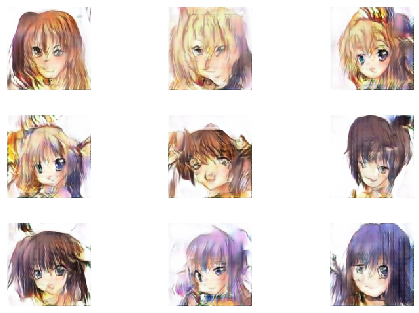

========== 360 =s=========


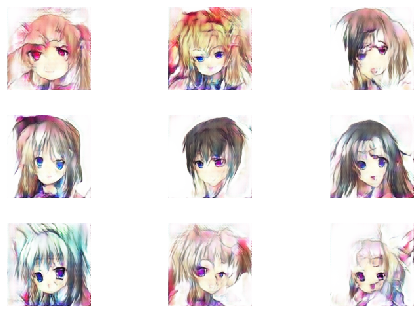

========== 400 =s=========


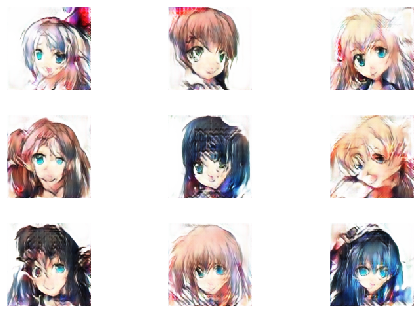

========== 440 =s=========


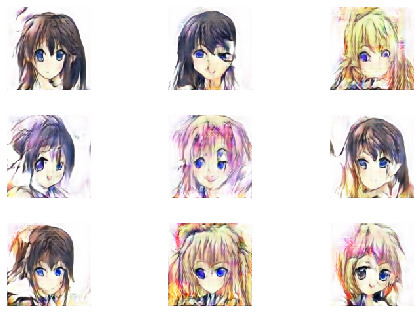

========== 480 =s=========


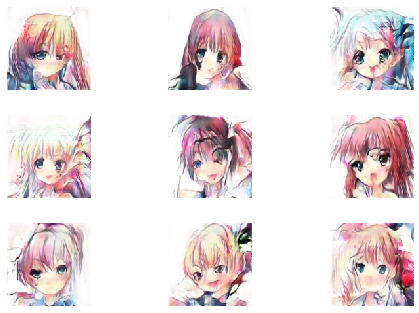

========== 520 =s=========


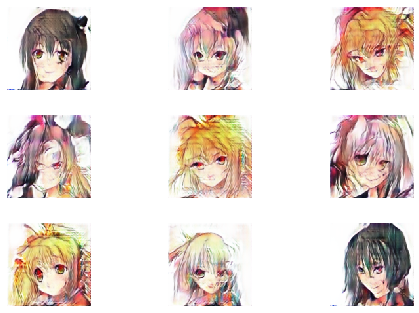

========== 560 =s=========


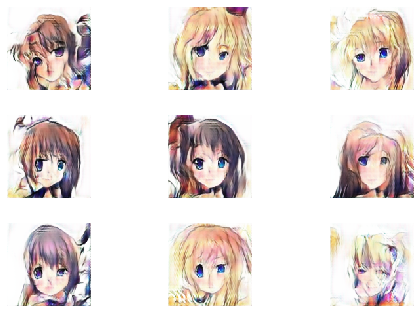

========== 600 =s=========


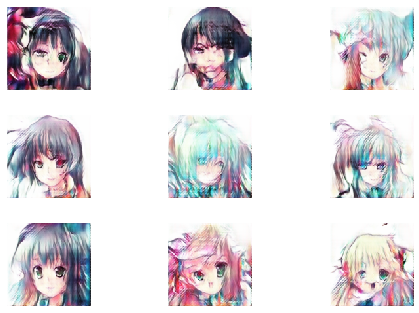

========== 640 =s=========


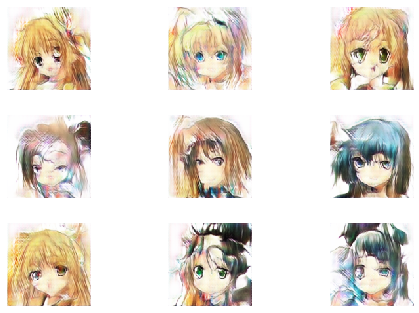

========== 680 =s=========


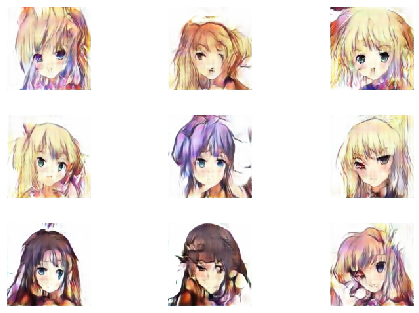

========== 720 =s=========


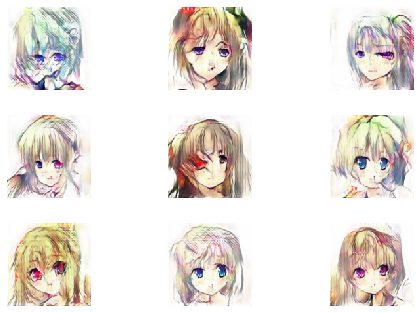

========== 760 =s=========


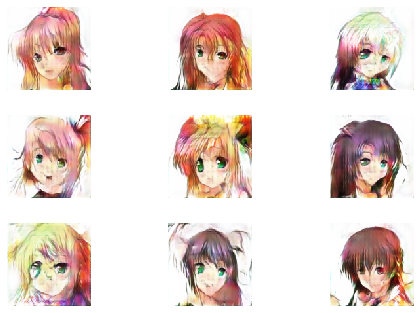

========== 800 =s=========


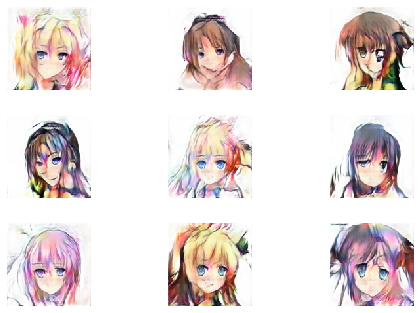

========== 840 =s=========


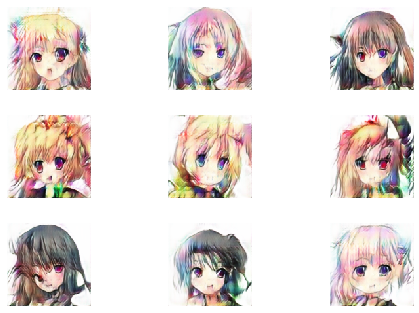

========== 880 =s=========


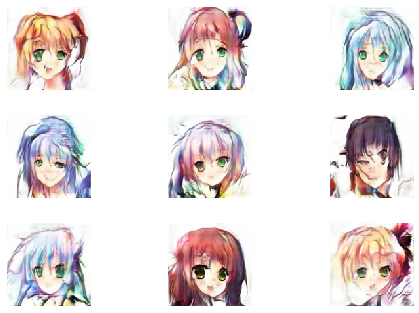

========== 920 =s=========


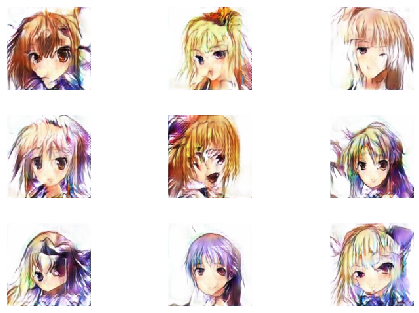

========== 960 =s=========


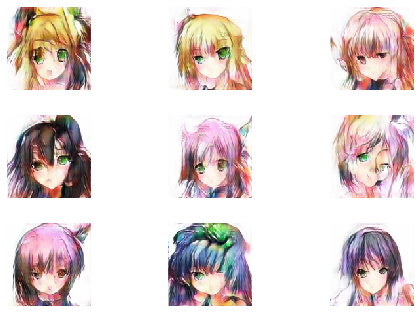

========== 1000 =s=========


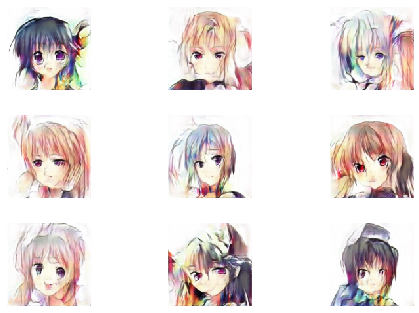

========== 1040 =s=========


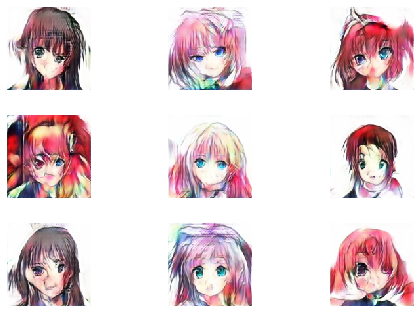

========== 1080 =s=========


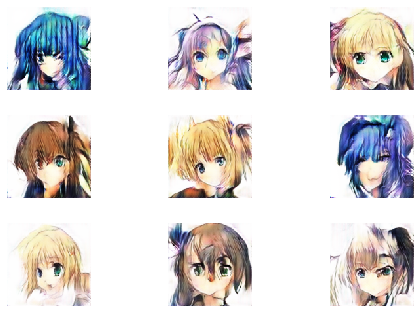

KeyboardInterrupt: ignored

In [ ]:
gan.train(full_img_data,4000,30)

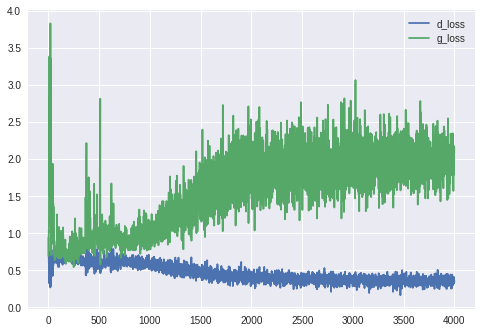

In [ ]:
gan.plot_result()

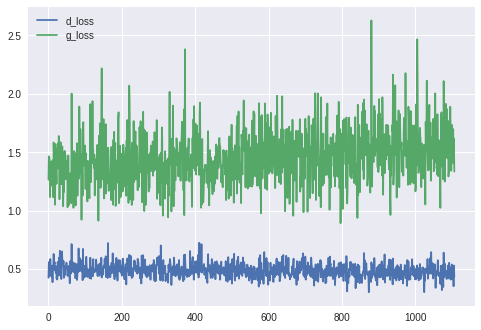

In [ ]:
gan.plot_result()

In [ ]:
12with open('image.pickle','rb') as f:
    pickle.dump(gan,f)

In [ ]:
gan.generator.save("generator.h5")

In [ ]:
gan.discriminator.save("discriminator.h5")

In [ ]:
with open('GAN.pickle','wb') as f:
    pickle.dump(gan,f)

In [ ]:
gan.discriminator.save('discriminator.h5')

In [ ]:
gan.generator.save('generator.h5')

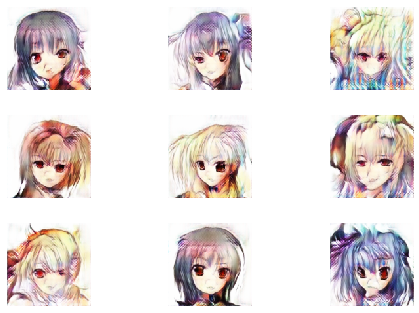

In [ ]:
gan.generate_9imgs()